# Generate data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SEED = 1234
NUM_SAMPLES = 50

In [3]:
np.random.seed(SEED)

In [4]:
def generate_data(num_samples):
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 3.5*X + random_noise
    return X, y

In [5]:
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [6]:
# Load into a pandas DF
df = pd.DataFrame(data, columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


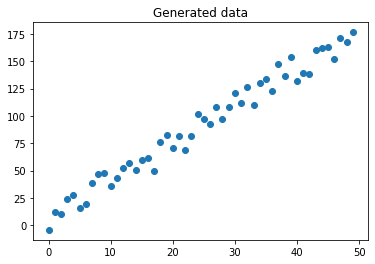

In [7]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

# LR using Numpy

### Split data

In [8]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [9]:
# shuffle
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [10]:
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [11]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val  : {X_val.shape},  y_val   : {y_val.shape}")
print(f"X_test : {X_test.shape},  y_test : {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val  : (7, 1),  y_val   : (7, 1)
X_test : (8, 1),  y_test : (8, 1)


### Standardize

In [12]:
def standardize_data(data, mean, std):
    return (data - mean) / std

In [13]:
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [14]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [15]:
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


### Weights

In [16]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

In [17]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print(f"W: {W.shape}")
print(f"B: {b.shape}")

W: (1, 1)
B: (1, 1)


### Model

In [18]:
# Forward pass
y_pred = np.dot(X_train, W) + b
print(f"y_pred {y_pred.shape}")

y_pred (35, 1)


### Loss

In [19]:
# MSE
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print(f"Loss: {loss}")

Loss: 0.9861645032469716


### Gradients

In [20]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

### Update weights

In [21]:
LEARNING_RATE = 1e-1

In [22]:
# update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

### Training

In [23]:
NUM_EPOCHS = 100

In [24]:
# Intialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = np.dot(X_train, W) + b
    # Loss
    loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)
    # Show progress
    if epoch%10 == 0:
        print(f"Epoch: {epoch}, loss: {loss:.3f}")
    # Backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)
    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.990
Epoch: 10, loss: 0.039
Epoch: 20, loss: 0.028
Epoch: 30, loss: 0.028
Epoch: 40, loss: 0.028
Epoch: 50, loss: 0.028
Epoch: 60, loss: 0.028
Epoch: 70, loss: 0.028
Epoch: 80, loss: 0.028
Epoch: 90, loss: 0.028


### Evaluation

In [25]:
# predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

In [26]:
# train and test MSE
train_mse = np.mean((y_train - pred_train)**2)
test_mse = np.mean((y_test - pred_test)**2)
print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

Train MSE: 0.03, Test MSE: 0.01


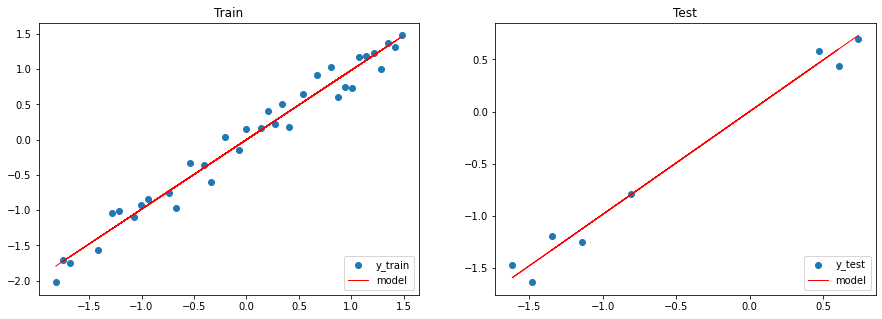

In [27]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()


### Interpretability

Since we standardized our inputs and outputs, our weights were fit to those standardized values. So we need to unstandardize our weights so we can compare it to our true weight

In [28]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.4X + 7.8
